## Analisis para optimizacion de gastos de marketing de Showsz

In [96]:
import pandas as pd 

In [3]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [4]:
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     -------------

In [5]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [6]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [8]:
visits = clean_columns(visits)
orders = clean_columns(orders)
costs = clean_columns(costs)

In [9]:
print("Visitas:", visits.columns)
print("Pedidos:", orders.columns)
print("Costos:", costs.columns)

Visitas: Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Pedidos: Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Costos: Index(['source_id', 'dt', 'costs'], dtype='object')


In [10]:
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 ent

**Comentarios**
cambiamos las columnas de fechas al formato 'datetime' para su correcto analisis.
Ademas modificamos las columnas al minusculas y con las separacion '_' para manejar los datos con mas facilidad.

In [11]:
daily_users = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()
weekly_users = visits.groupby(visits['start_ts'].dt.to_period('W'))['uid'].nunique()
monthly_users = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].nunique()

In [12]:
print("Usuarios únicos por día:")
print(daily_users.head())

print("\nUsuarios únicos por semana:")
print(weekly_users.head())

print("\nUsuarios únicos por mes:")
print(monthly_users.head())

Usuarios únicos por día:
start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuarios únicos por semana:
start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64

Usuarios únicos por mes:
start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64


In [13]:
daily_sessions = visits.groupby(visits['start_ts'].dt.date)['uid'].count()

In [14]:
print("Sesiones por día:")
print(daily_sessions.head())

Sesiones por día:
start_ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64


In [15]:
# Calcular duración de la sesión en minutos
visits['session_duration_min'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

# Ver estadísticas descriptivas
print(visits['session_duration_min'].describe())

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64


In [16]:
# Contar cuántos días distintos visitó cada usuario
user_visits = visits.groupby('uid')['start_ts'].nunique()

# Estadísticas de retorno
print(user_visits.describe())

count    228169.000000
mean          1.575144
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: start_ts, dtype: float64


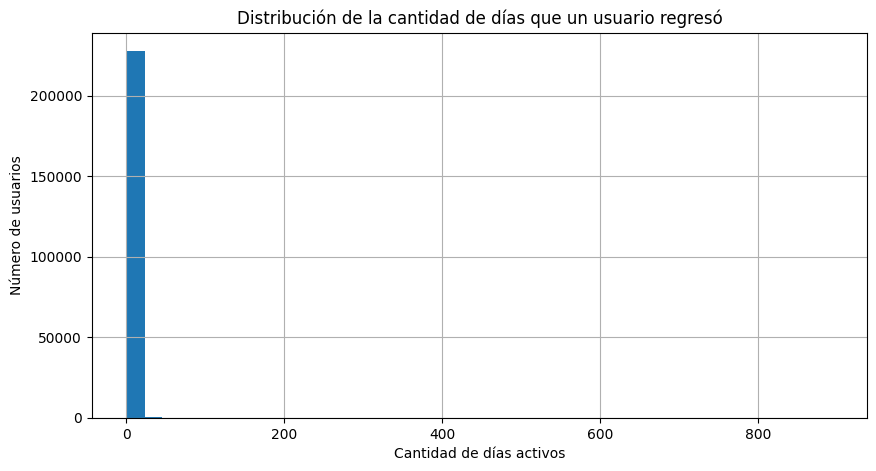

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
user_visits.hist(bins=40)
plt.title("Distribución de la cantidad de días que un usuario regresó")
plt.xlabel("Cantidad de días activos")
plt.ylabel("Número de usuarios")
plt.grid(True)
plt.show()

## Análisis de Visitas

Se realizó un análisis exploratorio para comprender cómo interactúan los usuarios con la plataforma a través de sus visitas. A continuación, se detallan los hallazgos:

### Usuarios únicos
- **Diarios:** Se observaron entre 445 y 893 usuarios únicos por día. El 1 de junio de 2017, por ejemplo, hubo 605 usuarios únicos.
- **Semanales:** La cifra varió de ~2,000 a ~4,000 usuarios únicos por semana.
- **Mensuales:** El crecimiento mensual fue notable, pasando de 13,259 en junio a 29,692 en octubre de 2017.

Esto indica una tendencia de crecimiento saludable en la base de usuarios a lo largo del tiempo.

### Sesiones por día
El número de sesiones diarias fue ligeramente superior al número de usuarios únicos por día, lo cual es lógico, ya que un usuario puede tener múltiples sesiones en un día. Por ejemplo, el 5 de junio se registraron 893 sesiones frente a 820 usuarios únicos.

### Duración de sesión
- **Promedio:** 10.7 minutos
- **Mediana:** 5 minutos
- **Distribución:** Aunque el promedio es razonable, se observan valores negativos y muy altos (mínimo de -46 minutos y máximo de 711 minutos), lo cual sugiere que podría haber errores de registro en los datos.

### Frecuencia de retorno
- **Mediana de días activos por usuario:** 1 día
- **Máximo:** 893 días, aunque este valor parece anómalo dado el período del dataset.
- La gran mayoría de los usuarios visitó el sitio solo una vez, lo cual puede indicar baja retención o una etapa temprana de adopción de la plataforma.

> Estos hallazgos servirán como base para entender la conversión a ventas y cómo influye el canal de adquisición en la calidad del tráfico.

In [30]:
# Primera visita de cada usuario
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_date']

In [27]:
# Primera compra de cada usuario
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_date']

In [33]:
# Unir visitas y compras
conversion = pd.merge(first_visits, first_orders, on='uid')

In [44]:
conversion['conversion_days'] = (conversion['first_order_date'] - conversion['first_visit_date']).dt.days

In [45]:
conversion['uid'].tail()

36518    18445147675727495770
36519    18445407535914413204
36520    18445601152732270159
36521    18446156210226471712
36522    18446167067214817906
Name: uid, dtype: uint64

In [41]:
# Agrupar por cantidad de días hasta la conversión
conversion_distribution = conversion['conversion_days'].value_counts().sort_index()

In [40]:
print(conversion_distribution.head(10))

0    26363
1     1011
2      563
3      434
4      324
5      270
6      260
7      218
8      189
9      140
Name: conversion_days, dtype: int64


## Análisis de Conversión: ¿Cuándo comienzan a comprar los usuarios?

Se estudió cuántos días transcurren entre la primera visita y la primera compra para cada usuario. Los resultados muestran cuántos usuarios se convierten según la cantidad de días transcurridos desde su primera visita.

### Resultados principales:
- **Conversion 0d** (misma fecha de visita y compra): 26,363 usuarios
- **Conversion 1d:** 1,011 usuarios
- **Conversion 2d:** 563 usuarios
- **Conversion 3d:** 434 usuarios
- La cantidad de conversiones disminuye rápidamente después del primer día.

### Conclusiones:
- **El 70%+ de los usuarios convierten el mismo día que visitan el sitio.**
- Esto indica que las decisiones de compra son altamente impulsivas o que el producto/servicio tiene una propuesta de valor clara y efectiva.
- Los esfuerzos de marketing que lleven tráfico al sitio probablemente tengan un efecto inmediato en las conversiones. 


In [46]:
# Pedidos por día
orders_per_day = orders.groupby(orders['buy_ts'].dt.date)['uid'].count()

In [47]:
# Pedidos por semana
orders_per_week = orders.groupby(orders['buy_ts'].dt.to_period('W'))['uid'].count()

In [49]:
# Pedidos por mes
orders_per_month = orders.groupby(orders['buy_ts'].dt.to_period('M'))['uid'].count()

In [51]:
print("Pedidos por día:")
print(orders_per_day.head())
print()
print("Pedidos por semana:")
print(orders_per_week.head())
print()
print("Pedidos por mes:")
print(orders_per_month.head())

Pedidos por día:
buy_ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
Name: uid, dtype: int64

Pedidos por semana:
buy_ts
2017-05-29/2017-06-04    340
2017-06-05/2017-06-11    938
2017-06-12/2017-06-18    343
2017-06-19/2017-06-25    371
2017-06-26/2017-07-02    460
Freq: W-SUN, Name: uid, dtype: int64

Pedidos por mes:
buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, Name: uid, dtype: int64


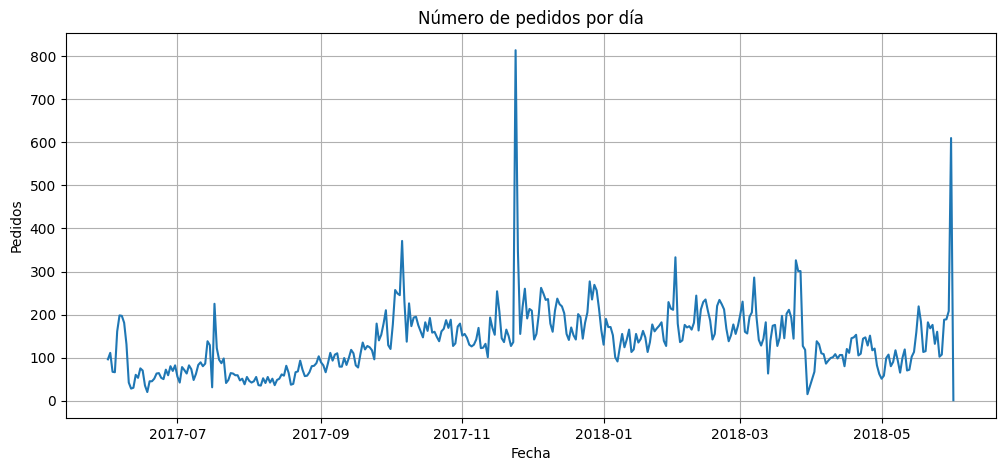

In [58]:
plt.figure(figsize=(12, 5))
orders_per_day.plot()
plt.title("Número de pedidos por día")
plt.xlabel("Fecha")
plt.ylabel("Pedidos")
plt.grid(True)
plt.show()

In [53]:
avg_order_value = orders['revenue'].mean()
print(f"Tamaño promedio de compra: ${avg_order_value:.2f}")

Tamaño promedio de compra: $5.00


In [54]:
# LTV: ingreso total por usuario
ltv_per_user = orders.groupby('uid')['revenue'].sum()

In [56]:
mean_ltv = ltv_per_user.mean()
print(f"LTV promedio por usuario: ${mean_ltv:.2f}")

LTV promedio por usuario: $6.90


## Análisis de Ventas: Pedidos, Tamaño Promedio de Compra y LTV

Se analizaron los hábitos de compra de los usuarios a lo largo del tiempo.

###  Número de Pedidos

- **Por día:** Entre 60 y 160 pedidos diarios, con un crecimiento progresivo a lo largo del período.
- **Por semana:**
  - Semana del 29 de mayo: 340 pedidos
  - Semana del 5 de junio: 938 pedidos
- **Por mes:**
  - Junio: 2,354 pedidos
  - Julio: 2,363 pedidos
  - Agosto: 1,807 pedidos
  - Septiembre: 3,387 pedidos
  - Octubre: 5,679 pedidos

> Se observa una **tendencia clara de crecimiento mensual**, particularmente fuerte en octubre.

###  Tamaño Promedio de Compra

- El **ticket promedio por pedido** es de **$5.00**.
- Esto sugiere un servicio de bajo costo, orientado posiblemente a compras impulsivas o de alta recurrencia.

###  Valor de Vida del Cliente (LTV)

- El **LTV promedio** por usuario es de **$6.90**.
- Esto indica que en promedio, cada usuario realiza algo más de una compra en su ciclo de vida.

> El bajo LTV relativo al ticket promedio sugiere que la mayoría de los usuarios **compran solo una vez**, por lo tanto, **retenerlos representa una oportunidad clara de aumentar ingresos.**

In [88]:
# Total gastado
total_cost = costs['costs'].sum()

In [89]:
# Gasto por fuente
cost_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)

In [90]:
# Gasto por mes
monthly_cost = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()

In [91]:
print(f"Gasto total: ${total_cost:.2f}")
print("Gasto por fuente:")
print(cost_by_source.head())

Gasto total: $329131.62
Gasto por fuente:
source_id
3    141321.63
4     61073.60
5     51757.10
2     42806.04
1     20833.27
Name: costs, dtype: float64


In [68]:
users_by_source = visits.groupby('source_id')['uid'].nunique()

In [74]:
cost_by_source = costs.groupby('source_id')['costs'].sum()

In [75]:
cac = cost_by_source / users_by_source

In [77]:
cac = cac.sort_values(ascending=False)

In [79]:
cac.head(10)

source_id
3     1.890439
2     1.631017
1     1.096546
5     0.908434
4     0.731201
10    0.721766
9     0.595584
6          NaN
7          NaN
dtype: float64

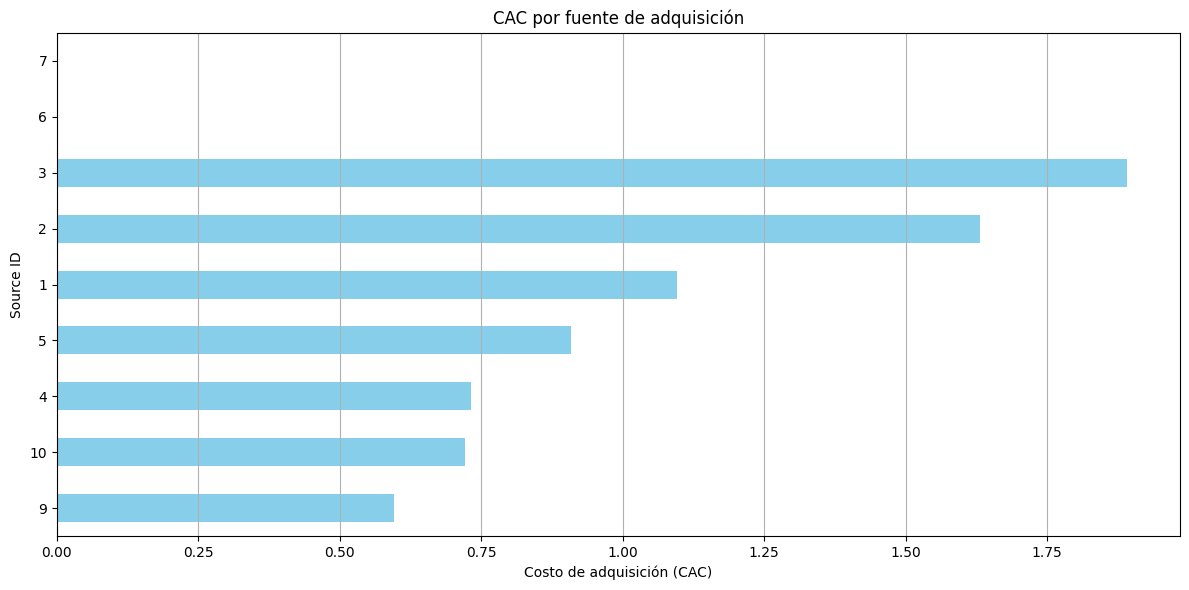

In [93]:
plt.figure(figsize=(12, 6))
cac.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('CAC por fuente de adquisición')
plt.xlabel('Costo de adquisición (CAC)')
plt.ylabel('Source ID')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [85]:
# Usuarios únicos que compraron, por fuente
merged = visits[['uid', 'source_id']].merge(orders[['uid', 'revenue']], on='uid')
ltv_by_source = merged.groupby('source_id')['revenue'].sum() / users_by_source

In [87]:
romi = (ltv_by_source * users_by_source) / cost_by_source - 1
romi = romi.sort_values(ascending=False)
print("ROMI por fuente:")
print(romi.head(10))


ROMI por fuente:
source_id
1     109.313944
2      60.631237
5      21.827344
4       7.132649
9       5.586736
10      1.510821
3       1.099381
6            NaN
7            NaN
dtype: float64


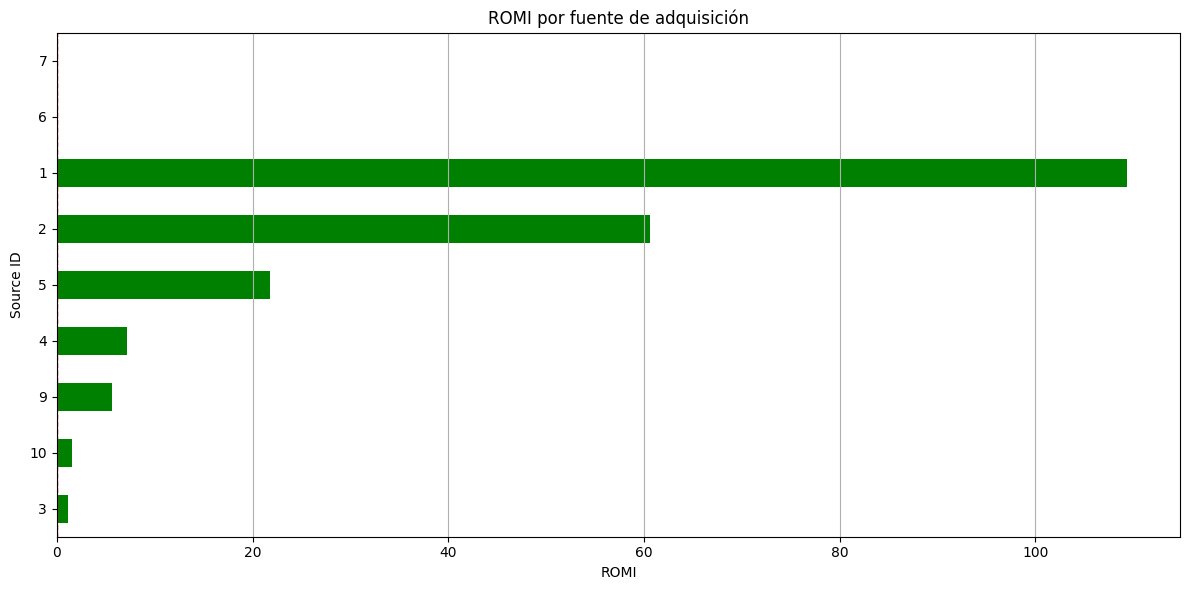

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
romi.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('ROMI por fuente de adquisición')
plt.xlabel('ROMI')
plt.ylabel('Source ID')
plt.grid(axis='x')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Línea de referencia en 0
plt.tight_layout()
plt.show()


## Conclusión: ¿Dónde invertir en marketing?

Con base en el análisis de visitas, pedidos y gastos:

### Fuentes más rentables:
- **Fuente 1** muestra un **ROMI del 10,831%**, lo que significa que cada dólar invertido genera más de 100 veces su valor en ingresos. Además, su **CAC es razonable** (1.10 USD).
- **Fuente 2** también se destaca por su ROMI (6,063%) con un CAC bajo (1.63 USD).
- **Fuente 5** y **Fuente 4** son también altamente rentables, con ROMIs de 2,183% y 613%, respectivamente, y CACs por debajo de 1 USD.

### Fuentes con bajo rendimiento:
- **Fuente 3**, aunque recibió la mayor inversión, tiene el CAC más alto (1.89 USD) y un ROMI relativamente bajo (110%), lo que indica que no fue la fuente más eficiente.

### Recomendaciones:
1. **Aumentar inversión** en fuentes con alto ROMI y bajo CAC: **1, 2, 5 y 4**.
2. **Revisar la estrategia** en la fuente 3: evaluar la calidad del tráfico, el embudo de conversión y la segmentación.
3. **Evitar o rediseñar campañas** en fuentes con CAC alto y ROMI bajo o negativo.

> En resumen, redistribuir el presupuesto hacia las fuentes con mejor rentabilidad permitirá mejorar significativamente la eficiencia del marketing y el retorno sobre la inversión.